<a href="https://colab.research.google.com/github/ThierrryScotto/Spaceship-Titanic/blob/main/Spaceship_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting the dataset

In [1]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download spaceship-titanic
! unzip spaceship-titanic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  0% 0.00/299k [00:00<?, ?B/s]
100% 299k/299k [00:00<00:00, 84.2MB/s]
Archive:  spaceship-titanic.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


# Data analysis

### Libraries

In [596]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load data

In [597]:
df_train = pd.read_csv("/content/train.csv")
df_test = pd.read_csv("/content/test.csv")
submission = pd.read_csv("/content/sample_submission.csv")

## **Analyse train**

In [598]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


*Feature descriptions:*
> * **PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
> * **HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.
> * **CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
> * **Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
> * **Destination** - The planet the passenger will be debarking to.
> * **Age** - The age of the passenger.
> * **VIP** - Whether the passenger has paid for special VIP service during the voyage.
> * **RoomService**, **FoodCourt**, **ShoppingMall**, **Spa**, **VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
> * **Name** - The first and last names of the passenger.
> * **Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [599]:
df_train.shape

(8693, 14)

In [600]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [601]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


### Missing Values

In [602]:
print("Train set missing values:")
print(df_train.isna().sum())
print("")
print("Test set missing values:")
print(df_test.isna().sum())

Train set missing values:
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Test set missing values:
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [603]:
df_train.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [604]:
df_train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [605]:
df_train = df_train.dropna()

In [606]:
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [607]:
df_train.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

### Analyse target

In [608]:
df_train['Transported'].replace({False: 0, True: 1}, inplace=True)
df_train['Transported']

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 6606, dtype: int64

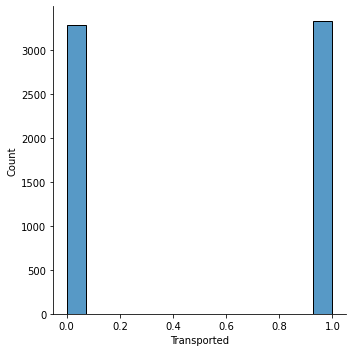

In [609]:
sns.displot(df_train['Transported'])

In [610]:
transported_count = df_train['Transported'].value_counts()
transported_count

1    3327
0    3279
Name: Transported, dtype: int64

In [611]:
transported_percent = transported_count / len(df_train)
transported_percent

1    0.503633
0    0.496367
Name: Transported, dtype: float64

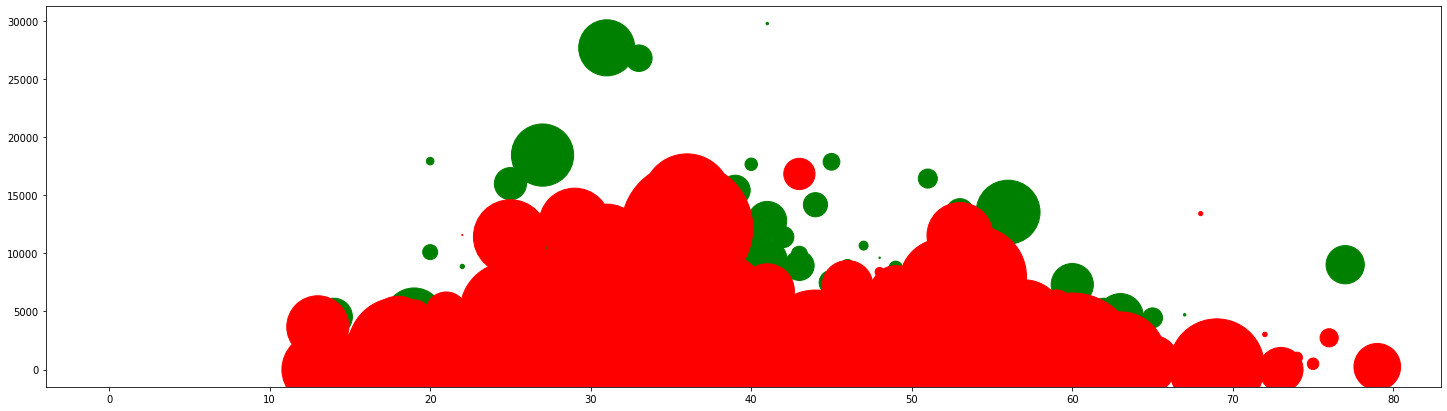

In [612]:
plt.figure(figsize=(25, 7))
ax = plt.subplot()
ax.scatter(df_train[df_train['Transported'] == 1]['Age'], df_train[df_train['Transported'] == 1]['FoodCourt'], c='green', s=df_train[df_train['Transported'] == 1]['VRDeck'])
ax.scatter(df_train[df_train['Transported'] == 0]['Age'], df_train[df_train['Transported'] == 0]['FoodCourt'], c='red', s=df_train[df_train['Transported'] == 0]['VRDeck'])

### Drop target

In [613]:
target = df_train['Transported']

df_train.drop(['Transported'], axis=1, inplace=True)
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre


## Combine Train and Test

In [614]:
data_frame = df_train.append(df_test)
data_frame

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


### Analyse Data frame

In [615]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10883 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   10883 non-null  object 
 1   HomePlanet    10796 non-null  object 
 2   CryoSleep     10790 non-null  object 
 3   Cabin         10783 non-null  object 
 4   Destination   10791 non-null  object 
 5   Age           10792 non-null  float64
 6   VIP           10790 non-null  object 
 7   RoomService   10801 non-null  float64
 8   FoodCourt     10777 non-null  float64
 9   ShoppingMall  10785 non-null  float64
 10  Spa           10782 non-null  float64
 11  VRDeck        10803 non-null  float64
 12  Name          10789 non-null  object 
dtypes: float64(6), object(7)
memory usage: 1.2+ MB


In [616]:
data_frame.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,10792.000000,10801.000000,10777.000000,10785.000000,10782.000000,10803.000000
mean,28.802539,221.544764,463.680894,177.945387,309.246151,306.472369
std,14.396816,630.484127,1621.887223,570.343750,1133.658617,1175.106100
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,51.000000,81.000000,31.000000,59.000000,44.000000
max,79.000000,11567.000000,29813.000000,12253.000000,22408.000000,22272.000000


### Checking for null values

In [617]:
data_frame.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

### Handling negative values

In [618]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(random_state=42)

date = pd.Timestamp('2200-01-01')

for col in data_frame:
    if data_frame[col].dtype=="object":
        data_frame[col].fillna("not listed", inplace=True)
    elif data_frame[col].dtype=="int":
        data_frame[col].fillna(data_frame[col].mean(), inplace=True)
    elif data_frame[col].dtype=='float':
       #X[col].fillna(X[col].mean(), inplace=True)
       data_frame[col] = imp.fit_transform(data_frame[col].values.reshape(-1,1))
    elif data_frame[col].dtype=="datetime64[ns]":
        data_frame[col].fillna(date, inplace=True)
data_frame

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.000000,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.000000,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.000000,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.000000,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.000000,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.000000,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,not listed,TRAPPIST-1e,42.000000,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,28.802539,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,not listed,28.802539,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [619]:
data_frame.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

# Analyse features and Data preparation

#### Home Planet

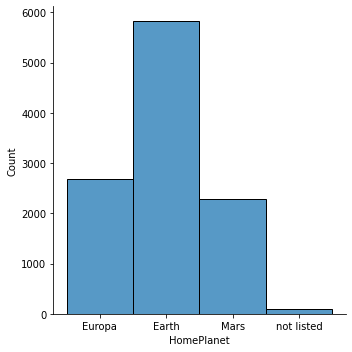

In [620]:
sns.displot(data_frame['HomePlanet'])

In [621]:
home_planet_count = data_frame['HomePlanet'].value_counts()
home_planet_count

Earth         5829
Europa        2675
Mars          2292
not listed      87
Name: HomePlanet, dtype: int64

In [622]:
home_planet_percent = home_planet_count / len(data_frame)
home_planet_percent

Earth         0.535606
Europa        0.245796
Mars          0.210604
not listed    0.007994
Name: HomePlanet, dtype: float64

<function matplotlib.pyplot.show>

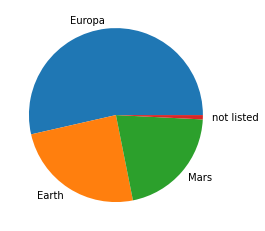

In [623]:
labels = ['Europa', 'Earth', 'Mars', 'not listed']
plt.pie(home_planet_percent, labels=labels)
plt.show

Europa = 1, Earth = 2, Mars = 3, not listed = 4

In [624]:
data_frame['HomePlanet'] = data_frame['HomePlanet'].replace({ 'Europa': 1, 'Earth': 2, 'Mars': 3, 'not listed': 4 })
data_frame['HomePlanet']

0       1
1       2
2       1
3       1
4       2
       ..
4272    2
4273    2
4274    3
4275    1
4276    2
Name: HomePlanet, Length: 10883, dtype: int64

#### Cryosleep

In [625]:
data_frame['CryoSleep'][data_frame['CryoSleep'] == 'not listed'] = False

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [626]:
print(data_frame.iloc[6674])

PassengerId         0156_01
HomePlanet                3
CryoSleep             False
Cabin                F/34/P
Destination     TRAPPIST-1e
Age               28.802539
VIP                   False
RoomService             0.0
FoodCourt               0.0
ShoppingMall            0.0
Spa                     0.0
VRDeck                  0.0
Name            Tures Upead
Name: 68, dtype: object


In [627]:
data_frame['CryoSleep'].replace({ False: 0, True:1 })

0       0
1       0
2       0
3       0
4       0
       ..
4272    1
4273    0
4274    1
4275    0
4276    1
Name: CryoSleep, Length: 10883, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


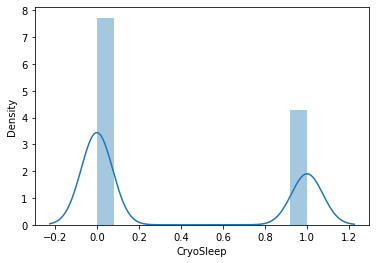

In [628]:
sns.distplot(data_frame['CryoSleep'])

In [629]:
cryosleep_count = data_frame['CryoSleep'].value_counts()
cryosleep_count

False    7007
True     3876
Name: CryoSleep, dtype: int64

In [630]:
cryosleep_percent = cryosleep_count / len(data_frame)
cryosleep_percent

False    0.643848
True     0.356152
Name: CryoSleep, dtype: float64

In [631]:
data_frame['CryoSleep'] = data_frame['CryoSleep'].astype(int)
data_frame['CryoSleep']

0       0
1       0
2       0
3       0
4       0
       ..
4272    1
4273    0
4274    1
4275    0
4276    1
Name: CryoSleep, Length: 10883, dtype: int64

### Destination

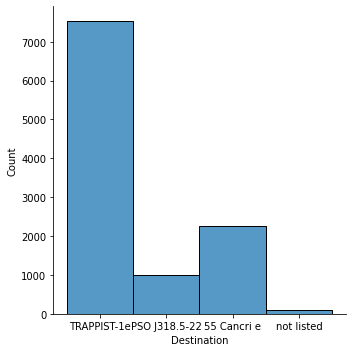

In [632]:
sns.displot(data_frame['Destination'])

In [633]:
destination_count = data_frame['Destination'].value_counts()
destination_count

TRAPPIST-1e      7532
55 Cancri e      2248
PSO J318.5-22    1011
not listed         92
Name: Destination, dtype: int64

In [634]:
destination_percent = destination_count / len(data_frame)
destination_percent

TRAPPIST-1e      0.692089
55 Cancri e      0.206561
PSO J318.5-22    0.092897
not listed       0.008454
Name: Destination, dtype: float64

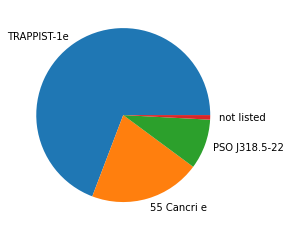

In [635]:
labels = ['TRAPPIST-1e', '55 Cancri e', 'PSO J318.5-22', 'not listed']
plt.pie(destination_percent, labels=labels)
plt.show()

In [636]:
data_frame['Destination'].replace({ 'TRAPPIST-1e': 1, '55 Cancri e': 2, 'PSO J318.5-22': 3, 'not listed': 4 }, inplace=True)
data_frame['Destination']

0       1
1       1
2       1
3       1
4       1
       ..
4272    1
4273    1
4274    2
4275    4
4276    3
Name: Destination, Length: 10883, dtype: int64

### Age

In [637]:
data_frame['Age']

0       39.000000
1       24.000000
2       58.000000
3       33.000000
4       16.000000
          ...    
4272    34.000000
4273    42.000000
4274    28.802539
4275    28.802539
4276    43.000000
Name: Age, Length: 10883, dtype: float64

In [638]:
data_frame['Age_group'] = pd.cut(x=data_frame['Age'], bins=[-1, 18, 40, 65, 100], labels=['child', 'young adult', 'middle age', 'pensioner'])
data_frame['Age_group']

0       young adult
1       young adult
2        middle age
3       young adult
4             child
           ...     
4272    young adult
4273     middle age
4274    young adult
4275    young adult
4276     middle age
Name: Age_group, Length: 10883, dtype: category
Categories (4, object): ['child' < 'young adult' < 'middle age' < 'pensioner']

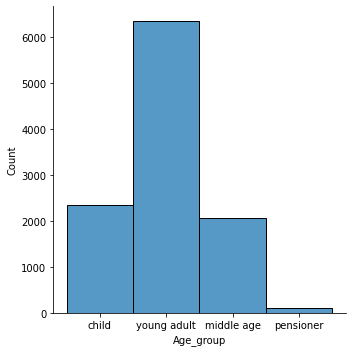

In [639]:
sns.displot(data_frame['Age_group'])

In [640]:
age_count = data_frame['Age_group'].value_counts()
age_count

young adult    6359
child          2340
middle age     2074
pensioner       110
Name: Age_group, dtype: int64

In [641]:
age_percent = age_count / len(data_frame)
age_percent

young adult    0.584306
child          0.215014
middle age     0.190572
pensioner      0.010108
Name: Age_group, dtype: float64

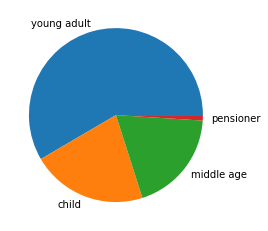

In [642]:
labels = ["young adult", "child", "middle age", "pensioner"]
plt.pie(age_percent, labels=labels)
plt.show()

In [643]:
# data_frame['Age_group'].replace({ "child": 1, "young adult": 2, "middle age": 3, "pensioner": 4 }, inplace=True)
# data_frame['Age_group']

In [644]:
data_frame['Age_group'].replace({"young adult": 1, "child": 2, "middle age": 3, "pensioner": 4},inplace=True)
data_frame['Age_group']

0       1
1       1
2       3
3       1
4       2
       ..
4272    1
4273    3
4274    1
4275    1
4276    3
Name: Age_group, Length: 10883, dtype: int64

In [645]:
data_frame['Age_group'] = data_frame['Age_group'].astype(int)

### VIP

In [646]:
data_frame['VIP'][data_frame['VIP'] == 'not listed'] = False

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [647]:
data_frame['VIP'].replace({False: 0, True: 1})

0       0
1       0
2       1
3       0
4       0
       ..
4272    0
4273    0
4274    0
4275    0
4276    0
Name: VIP, Length: 10883, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


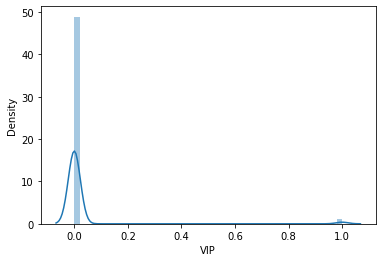

In [648]:
sns.distplot(data_frame['VIP'])

In [649]:
vip_count = data_frame['VIP'].value_counts()
vip_count

False    10647
True       236
Name: VIP, dtype: int64

In [650]:
vip_percent = vip_count / len(data_frame)
vip_percent

False    0.978315
True     0.021685
Name: VIP, dtype: float64

In [651]:
data_frame['VIP'] = data_frame['VIP'].astype(int)
data_frame['VIP']

0       0
1       0
2       1
3       0
4       0
       ..
4272    0
4273    0
4274    0
4275    0
4276    0
Name: VIP, Length: 10883, dtype: int64

### Room Service

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


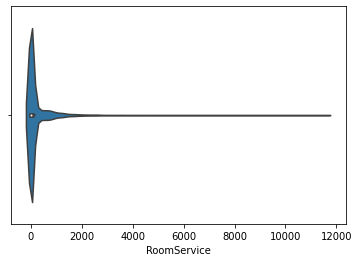

In [652]:
sns.violinplot(data_frame['RoomService'])

In [653]:
rm_service_high = data_frame['RoomService'].max()
print(rm_service_high)

11567.0


In [654]:
data_frame[data_frame['RoomService'] == 11567.0]['RoomService']

1237    11567.0
Name: RoomService, dtype: float64

In [655]:
data_frame['Room_Service_group'] = pd.cut(x=data_frame['RoomService'], bins=[-1, 2000, 8000, 12000], labels=['low', 'med', 'high'])
data_frame['Room_Service_group']

0       low
1       low
2       low
3       low
4       low
       ... 
4272    low
4273    low
4274    low
4275    low
4276    low
Name: Room_Service_group, Length: 10883, dtype: category
Categories (3, object): ['low' < 'med' < 'high']

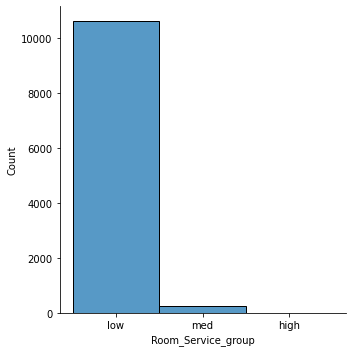

In [656]:
sns.displot(data_frame['Room_Service_group'])

In [657]:
rm_service_count = data_frame['Room_Service_group'].value_counts()
rm_service_count

low     10624
med       253
high        6
Name: Room_Service_group, dtype: int64

In [658]:
rm_service_percent = rm_service_count / len(data_frame)
rm_service_percent

low     0.976201
med     0.023247
high    0.000551
Name: Room_Service_group, dtype: float64

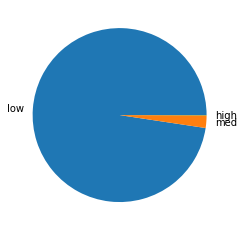

In [659]:
mylabels = ["low", "med", "high"]
plt.pie(rm_service_percent, labels=mylabels)
plt.show()

In [660]:
data_frame['Room_Service_group'].replace({"low": 1, "med": 2, "high": 3},inplace=True)
data_frame['Room_Service_group']

0       1
1       1
2       1
3       1
4       1
       ..
4272    1
4273    1
4274    1
4275    1
4276    1
Name: Room_Service_group, Length: 10883, dtype: int64

### Food Cour

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


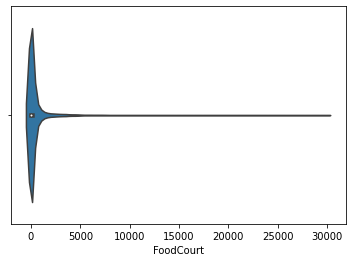

In [661]:
sns.violinplot(data_frame['FoodCourt'])

In [662]:
food_high = data_frame['FoodCourt'].max()
print(food_high)

29813.0


In [663]:
data_frame['Food_Court_group'] = pd.cut(x=data_frame['FoodCourt'], bins=[-1, 5000, 20000, 30000], labels=['low', 'med', 'high'])
data_frame['Food_Court_group']

0       low
1       low
2       low
3       low
4       low
       ... 
4272    low
4273    low
4274    low
4275    low
4276    low
Name: Food_Court_group, Length: 10883, dtype: category
Categories (3, object): ['low' < 'med' < 'high']

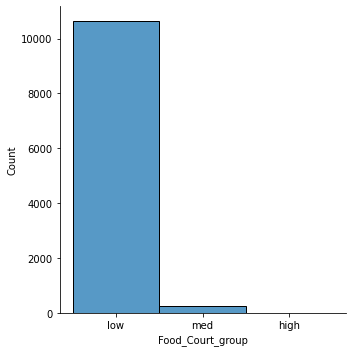

In [664]:
sns.displot(data_frame['Food_Court_group'])

In [665]:
fd_court_count = data_frame['Food_Court_group'].value_counts()
fd_court_count

low     10640
med       235
high        8
Name: Food_Court_group, dtype: int64

In [666]:
fd_court_percent = fd_court_count / len(data_frame)
fd_court_percent

low     0.977672
med     0.021593
high    0.000735
Name: Food_Court_group, dtype: float64

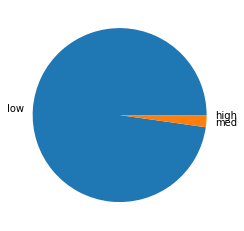

In [667]:
mylabels = ["low", "med", "high"]
plt.pie(fd_court_percent, labels=mylabels)
plt.show()

In [668]:
data_frame['Food_Court_group'].replace({"low": 1, "med": 2, "high": 3},inplace=True)
data_frame['Food_Court_group']

0       1
1       1
2       1
3       1
4       1
       ..
4272    1
4273    1
4274    1
4275    1
4276    1
Name: Food_Court_group, Length: 10883, dtype: int64

### Shopping Mall

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


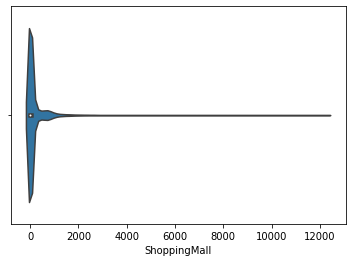

In [669]:
sns.violinplot(data_frame['ShoppingMall'])

In [670]:
shop_high = data_frame['ShoppingMall'].max()
print(shop_high)

12253.0


In [671]:
data_frame['Shopping_group'] = pd.cut(x=data_frame['ShoppingMall'], bins=[-1, 2000, 8000, 13000], labels=['low', 'med', 'high'])
data_frame['Shopping_group']

0       low
1       low
2       low
3       low
4       low
       ... 
4272    low
4273    low
4274    low
4275    low
4276    low
Name: Shopping_group, Length: 10883, dtype: category
Categories (3, object): ['low' < 'med' < 'high']

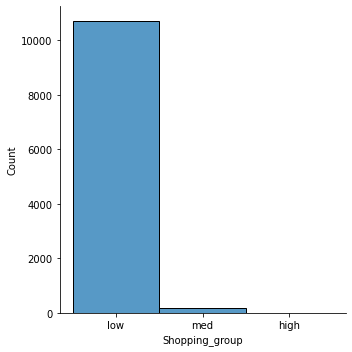

In [672]:
sns.displot(data_frame['Shopping_group'])

In [673]:
shopping_count = data_frame['Shopping_group'].value_counts()
shopping_count

low     10709
med       166
high        8
Name: Shopping_group, dtype: int64

In [674]:
shopping_percent = shopping_count / len(data_frame)
shopping_percent

low     0.984012
med     0.015253
high    0.000735
Name: Shopping_group, dtype: float64

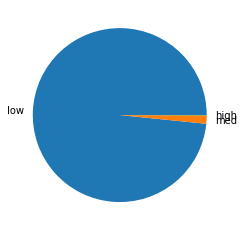

In [675]:
mylabels = ["low", "med", "high"]
plt.pie(shopping_percent, labels=mylabels)
plt.show()

In [676]:
data_frame['Shopping_group'].replace({"low": 1, "med": 2, "high": 3},inplace=True)
data_frame['Shopping_group']

0       1
1       1
2       1
3       1
4       1
       ..
4272    1
4273    1
4274    1
4275    1
4276    1
Name: Shopping_group, Length: 10883, dtype: int64

### SPA

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


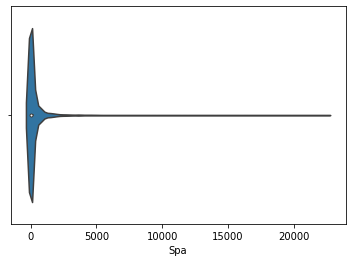

In [677]:
sns.violinplot(data_frame['Spa'])

In [678]:
spa_high = data_frame['Spa'].max()
print(spa_high)

22408.0


In [679]:
data_frame['Spa_group'] = pd.cut(x=data_frame['Spa'], bins=[-1, 5000, 15000, 23000], labels=['low', 'med', 'high'])
data_frame['Spa_group']

0       low
1       low
2       med
3       low
4       low
       ... 
4272    low
4273    low
4274    low
4275    low
4276    low
Name: Spa_group, Length: 10883, dtype: category
Categories (3, object): ['low' < 'med' < 'high']

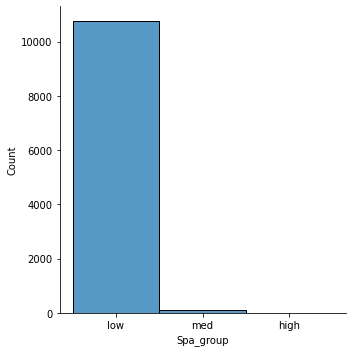

In [680]:
sns.displot(data_frame['Spa_group'])

In [681]:
spa_count = data_frame['Spa_group'].value_counts()
spa_count

low     10762
med       112
high        9
Name: Spa_group, dtype: int64

In [682]:
spa_percent = spa_count / len(data_frame)
spa_percent

low     0.988882
med     0.010291
high    0.000827
Name: Spa_group, dtype: float64

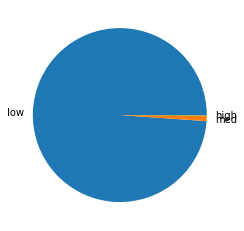

In [683]:
mylabels = ["low", "med", "high"]
plt.pie(spa_percent, labels=mylabels)
plt.show()

In [684]:
data_frame['Spa_group'].replace({"low": 1, "med": 2, "high": 3},inplace=True)
data_frame['Spa_group']

0       1
1       1
2       2
3       1
4       1
       ..
4272    1
4273    1
4274    1
4275    1
4276    1
Name: Spa_group, Length: 10883, dtype: int64

### VR Deck

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


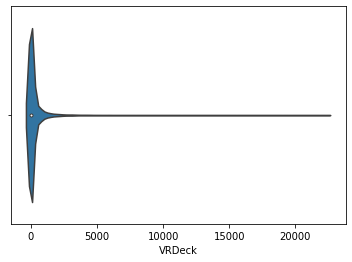

In [685]:
sns.violinplot(data_frame['VRDeck'])

In [686]:
vr_high = data_frame['VRDeck'].max()
print(vr_high)

22272.0


In [687]:
data_frame['VR_group'] = pd.cut(x=data_frame['VRDeck'], bins=[-1, 5000, 15000, 23000], labels=['low', 'med', 'high'])
data_frame['VR_group']

0       low
1       low
2       low
3       low
4       low
       ... 
4272    low
4273    low
4274    low
4275    low
4276    low
Name: VR_group, Length: 10883, dtype: category
Categories (3, object): ['low' < 'med' < 'high']

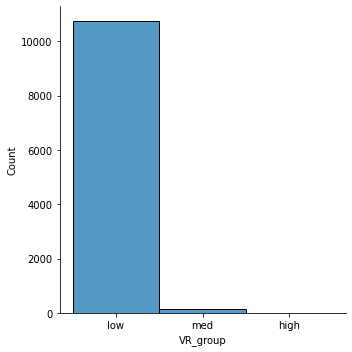

In [688]:
sns.displot(data_frame['VR_group'])

In [689]:
vr_count = data_frame['VR_group'].value_counts()
vr_count


low     10746
med       127
high       10
Name: VR_group, dtype: int64

In [690]:
vr_percent = vr_count / len(data_frame)
vr_percent

low     0.987412
med     0.011670
high    0.000919
Name: VR_group, dtype: float64

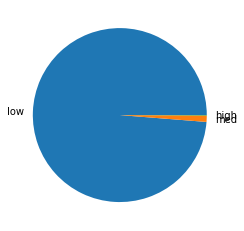

In [691]:
mylabels = ["low", "med", "high"]
plt.pie(vr_percent, labels=mylabels)
plt.show()

In [692]:
data_frame['VR_group'].replace({"low": 1, "med": 2, "high": 3},inplace=True)
data_frame['VR_group']

0       1
1       1
2       1
3       1
4       1
       ..
4272    1
4273    1
4274    1
4275    1
4276    1
Name: VR_group, Length: 10883, dtype: int64

### Assign features

In [693]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10883 entries, 0 to 4276
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         10883 non-null  object 
 1   HomePlanet          10883 non-null  int64  
 2   CryoSleep           10883 non-null  int64  
 3   Cabin               10883 non-null  object 
 4   Destination         10883 non-null  int64  
 5   Age                 10883 non-null  float64
 6   VIP                 10883 non-null  int64  
 7   RoomService         10883 non-null  float64
 8   FoodCourt           10883 non-null  float64
 9   ShoppingMall        10883 non-null  float64
 10  Spa                 10883 non-null  float64
 11  VRDeck              10883 non-null  float64
 12  Name                10883 non-null  object 
 13  Age_group           10883 non-null  int64  
 14  Room_Service_group  10883 non-null  int64  
 15  Food_Court_group    10883 non-null  int64  
 16  Shopp

## Define X and y

In [694]:
features = ["HomePlanet", "CryoSleep", "Destination", "Age_group", "Room_Service_group", "Food_Court_group", "Shopping_group", "Spa_group", "VR_group"]

y = target
X = data_frame[features][: len(df_train)]
X_text = data_frame[features][len(df_train) :]

In [695]:
features

['HomePlanet',
 'CryoSleep',
 'Destination',
 'Age_group',
 'Room_Service_group',
 'Food_Court_group',
 'Shopping_group',
 'Spa_group',
 'VR_group']

## Heatmap

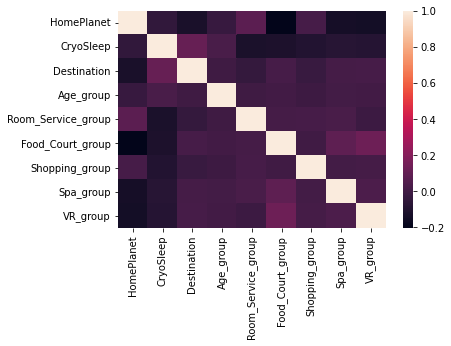

In [696]:
cmap = data_frame[features].corr()
sns.heatmap(cmap)

## Split dataset for training and validating

In [697]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1, stratify=y, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_test.shape

((5945, 9), (661, 9), (5945,), (661,), (661, 9))

# Training the algorithm

## Using KNeighbors

In [698]:
X_train

,HomePlanet,CryoSleep,Destination,Age_group,Room_Service_group,Food_Court_group,Shopping_group,Spa_group,VR_group
2802,2,0,1,1,1,1,1,1,1
2060,2,0,1,1,1,1,1,1,1
2947,2,0,3,2,1,1,1,1,1
2977,3,1,1,1,1,1,1,1,1
4080,3,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
1298,1,0,2,3,1,1,1,1,1
3220,2,1,1,3,1,1,1,1,1
6157,3,0,1,1,1,1,1,1,1
4192,2,0,1,1,1,1,1,1,1


In [699]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=22, algorithm='auto')
clf.fit(X_train, y_train)
predicted_value = clf.predict(X_test)

Predict validation

In [700]:
clf.score(X_train, y_train)

0.7416316232127839

## Using RandomForest

In [701]:
from sklearn.ensemble import RandomForestClassifier

In [702]:
print("train: ", X_train.shape)
print("test: ", X_test.shape)

train:  (5945, 9)
test:  (661, 9)


Text(0, 0.5, 'Testing Accuracy')

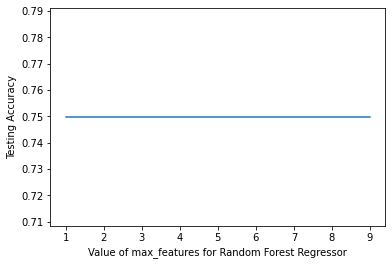

In [703]:
max_features = [1, 3, 5, 9]
scores = []

for max_feature in max_features:
    random_forest = RandomForestClassifier(max_features=max_feature)
    random_forest.fit(X_train, y_train)
    score = random_forest.score(X_train, y_train)
    scores.append(score)

plt.plot(max_features, scores)
plt.xlabel('Value of max_features for Random Forest Regressor')
plt.ylabel('Testing Accuracy')

Text(0, 0.5, 'Testing Accuracy')

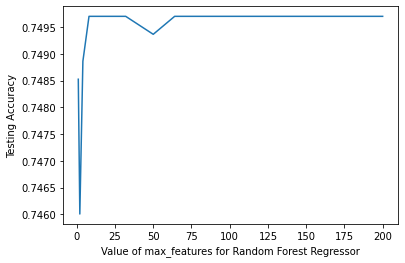

In [704]:
n_estimators = [1, 2, 4, 8, 16, 30, 32, 50, 64, 100, 120, 160, 200]
scores = []

for n_estimator in n_estimators:
    random_forest = RandomForestClassifier(max_features=5, n_estimators=n_estimator)
    random_forest.fit(X_train, y_train)
    score = random_forest.score(X_train, y_train)
    scores.append(score)

plt.plot(n_estimators, scores)
plt.xlabel('Value of max_features for Random Forest Regressor')
plt.ylabel('Testing Accuracy')

In [705]:
random_forest = RandomForestClassifier(max_features=5, n_estimators=125)
random_forest.fit(X_train, y_train)
random_forest.score(X_train, y_train)
predicted_value = random_forest.predict(X_test)

In [706]:
rf_predictions = predicted_value.astype(str)
rf_predictions = np.char.replace(predictions, '0', 'False')
rf_predictions = np.char.replace(predictions, '1', 'True')
rf_predictions

array(['True', 'True', 'False', 'False', 'False', 'False', 'True',
       'False', 'False', 'False', 'True', 'False', 'True', 'False',
       'False', 'True', 'True', 'True', 'True', 'False', 'False', 'False',
       'False', 'True', 'False', 'False', 'True', 'True', 'True', 'False',
       'True', 'False', 'False', 'False', 'False', 'False', 'True',
       'False', 'False', 'True', 'True', 'False', 'False', 'False',
       'False', 'False', 'True', 'False', 'False', 'False', 'True',
       'False', 'True', 'True', 'False', 'False', 'True', 'False',
       'False', 'True', 'False', 'False', 'False', 'True', 'False',
       'True', 'True', 'False', 'False', 'False', 'False', 'False',
       'False', 'False', 'True', 'True', 'False', 'False', 'True',
       'False', 'False', 'True', 'False', 'True', 'False', 'False',
       'False', 'False', 'False', 'False', 'False', 'False', 'False',
       'True', 'False', 'False', 'False', 'True', 'False', 'False',
       'False', 'False', 'False', '

Predict validation

In [707]:
random_forest.score(X_train, y_train)

0.7497056349873844

## Using Linear Regression

In [708]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42, C=10).fit(X_train, y_train)
print(model.score(X_train, y_train))

0.7404541631623213


Predict validation

In [709]:
y_pred = model.predict(X_test)
print(model.score(X_test, y_test))

0.7428139183055976


Confusion matrix

In [710]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[292  36]
 [134 199]]


Prediction on X_test

In [711]:
predictions = model.predict(X_test)
predictions = predictions.astype(str)
predictions = np.char.replace(predictions, '0', 'False')
predictions = np.char.replace(predictions, '1', 'True')
predictions

array(['True', 'True', 'False', 'False', 'False', 'False', 'True',
       'False', 'False', 'False', 'True', 'False', 'True', 'False',
       'False', 'True', 'True', 'True', 'True', 'False', 'False', 'False',
       'False', 'True', 'False', 'False', 'True', 'True', 'True', 'False',
       'True', 'False', 'False', 'False', 'False', 'False', 'True',
       'False', 'False', 'True', 'True', 'False', 'False', 'False',
       'False', 'False', 'True', 'False', 'False', 'False', 'True',
       'False', 'True', 'True', 'False', 'False', 'True', 'False',
       'False', 'True', 'False', 'False', 'False', 'True', 'False',
       'True', 'True', 'False', 'False', 'False', 'False', 'False',
       'False', 'False', 'True', 'True', 'False', 'False', 'True',
       'False', 'False', 'True', 'False', 'True', 'False', 'False',
       'False', 'False', 'False', 'False', 'False', 'False', 'False',
       'True', 'False', 'False', 'False', 'True', 'False', 'False',
       'False', 'False', 'False', '

# Importing result to csv

In [712]:
submission['Transported'] = predictions
submission.to_csv('submission.csv', index=False)
my_submission = pd.read_csv("submission.csv")
my_submission

ValueError: ignored

In [ ]:
pred = pd.DataFrame(rf_predictions)
sub_df = pd.read_csv('sample_submission.csv')
datasets = pd.concat([sub_df['PassengerId'], pred], axis=1)
datasets.columns = ['PassengerId', 'Transported']
datasets.to_csv('predicted_submission.csv', index=False)